Logistic regression is a statistical method used to analyze the relationship between a set of independent variables and a binary dependent variable. In the case of credit card fraud detection, the dependent variable would be whether or not the transaction was fraudulent, and the independent variables could include factors such as the category of purchase, whether or not the purchase was made during a holiday, the location of the purchase, and other relevant variables.

A confusion matrix is a tool used to evaluate the performance of a classification model. It shows the number of correct and incorrect predictions made by the model, and it can be used to calculate metrics such as accuracy, precision, and recall.

To implement logistic regression and a confusion matrix in Python, you can use the scikit-learn library. Here is a sample code snippet that shows how to train a logistic regression model on credit card transaction data and generate a confusion matrix.

# Step 1: Importing the Credit Card Fraud Data 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [7]:
df = pd.read_csv("/content/drive/MyDrive/441_Lecture_3/fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# Step 2: Select four columns to use as features

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
# choosing the variables in order to define if it was done during the holiday; the amount of money; the population of the city, and the the location of the merchant
df_select= df[['trans_date_trans_time','amt', 'city_pop', 'is_fraud', 'merch_lat', 'merch_long' ]]

In [6]:
df_select

,trans_date_trans_time,amt,city_pop,is_fraud,merch_lat,merch_long
0,2020-06-21 12:14:25,2.86,333497,0,33.986391,-81.200714
1,2020-06-21 12:14:33,29.84,302,0,39.450498,-109.960431
2,2020-06-21 12:14:53,41.28,34496,0,40.495810,-74.196111
3,2020-06-21 12:15:15,60.05,54767,0,28.812398,-80.883061
4,2020-06-21 12:15:17,3.19,1126,0,44.959148,-85.884734
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,0,39.946837,-91.333331
555715,2020-12-31 23:59:09,111.84,28739,0,29.661049,-96.186633
555716,2020-12-31 23:59:15,86.88,3684,0,46.658340,-119.715054
555717,2020-12-31 23:59:24,7.99,129,0,44.470525,-117.080888


# Step 3: Creating a Holiday Indicator

In [7]:
type(df_select['trans_date_trans_time'][0])

str

In [8]:
df_select["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

/var/folders/32/6tv1kbfx7jn9vst5h14cqq4r0000gn/T/ipykernel_82284/1576655448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])


In [9]:
# According to statistics published online, majority of credit card frauds happen during the holiday season which is november and december, hence I create a dummy variable for it.
df_select['time_var'] = pd.to_datetime(df_select['trans_date_trans_time']).dt.month
df_select["time_var"] = ["Holiday" if 11 <= i <= 12 else "other" for i in df_select["time_var"]]
df_select = pd.concat([df_select, pd.get_dummies(df_select['time_var'], prefix='holiday', drop_first=True)], axis=1)


/var/folders/32/6tv1kbfx7jn9vst5h14cqq4r0000gn/T/ipykernel_82284/3273447805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = pd.to_datetime(df_select['trans_date_trans_time']).dt.month
/var/folders/32/6tv1kbfx7jn9vst5h14cqq4r0000gn/T/ipykernel_82284/3273447805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = ["Holiday" if 11 <= i <= 12 else "other" for i in df_select["time_var"]]


In [10]:
df_select

,trans_date_trans_time,amt,city_pop,is_fraud,merch_lat,merch_long,time_var,holiday_other
0,2020-06-21 12:14:25,2.86,333497,0,33.986391,-81.200714,other,1
1,2020-06-21 12:14:33,29.84,302,0,39.450498,-109.960431,other,1
2,2020-06-21 12:14:53,41.28,34496,0,40.495810,-74.196111,other,1
3,2020-06-21 12:15:15,60.05,54767,0,28.812398,-80.883061,other,1
4,2020-06-21 12:15:17,3.19,1126,0,44.959148,-85.884734,other,1
...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,0,39.946837,-91.333331,Holiday,0
555715,2020-12-31 23:59:09,111.84,28739,0,29.661049,-96.186633,Holiday,0
555716,2020-12-31 23:59:15,86.88,3684,0,46.658340,-119.715054,Holiday,0
555717,2020-12-31 23:59:24,7.99,129,0,44.470525,-117.080888,Holiday,0


In [11]:
X = df_select
y = df["is_fraud"]

In [12]:
df_select

,trans_date_trans_time,amt,city_pop,is_fraud,merch_lat,merch_long,time_var,holiday_other
0,2020-06-21 12:14:25,2.86,333497,0,33.986391,-81.200714,other,1
1,2020-06-21 12:14:33,29.84,302,0,39.450498,-109.960431,other,1
2,2020-06-21 12:14:53,41.28,34496,0,40.495810,-74.196111,other,1
3,2020-06-21 12:15:15,60.05,54767,0,28.812398,-80.883061,other,1
4,2020-06-21 12:15:17,3.19,1126,0,44.959148,-85.884734,other,1
...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,0,39.946837,-91.333331,Holiday,0
555715,2020-12-31 23:59:09,111.84,28739,0,29.661049,-96.186633,Holiday,0
555716,2020-12-31 23:59:15,86.88,3684,0,46.658340,-119.715054,Holiday,0
555717,2020-12-31 23:59:24,7.99,129,0,44.470525,-117.080888,Holiday,0


# Step 4: Training a Logistic regression.

In [13]:
df_select.drop(columns=["trans_date_trans_time", 'time_var'], inplace=True)

In [14]:
df_select.head()

,amt,city_pop,is_fraud,merch_lat,merch_long,holiday_other
0,2.86,333497,0,33.986391,-81.200714,1
1,29.84,302,0,39.450498,-109.960431,1
2,41.28,34496,0,40.495810,-74.196111,1
3,60.05,54767,0,28.812398,-80.883061,1
4,3.19,1126,0,44.959148,-85.884734,1


In [15]:
log_reg = LogisticRegression().fit(df_select,df["is_fraud"])

# Step 5: What if the company you are working for wants to target at a False Positive rate of 5% what threshold should you use?

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit the model 
model = LogisticRegression()
model.fit(df_select, df['is_fraud'])

# predict class labels for test data
y_pred = model.predict(df_select)

# set threshold
threshold = 0.05

# set predicted class labels based on threshold
y_pred_threshold = (y_pred > threshold).astype(int)

# calculate confusion matrix
cm = confusion_matrix(df_select['is_fraud'], y_pred_threshold)

# calculate accuracy
acc = accuracy_score(df_select['is_fraud'], y_pred_threshold)

print(cm)
print(acc)


[[553417    157]
 [  2145      0]]
0.9958576186885818


# Step 6: Logistic Regression and Feature Selection

In [113]:
from sklearn.linear_model import LassoCV
modCV2 = LassoCV().fit(df_select, df["is_fraud"])
l = modCV2.alpha_
l

0.10514538488607234

In [114]:
from sklearn.linear_model import Lasso
model = Lasso(alpha = l).fit(df_select, df["is_fraud"])

In [115]:
coeffs = model.coef_
coeffs

array([ 6.78301826e-05, -1.10997938e-09,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00])

In [116]:
cols = df_select.columns
cols

Index(['amt', 'city_pop', 'is_fraud', 'merch_lat', 'merch_long',
       'holiday_other'],
      dtype='object')

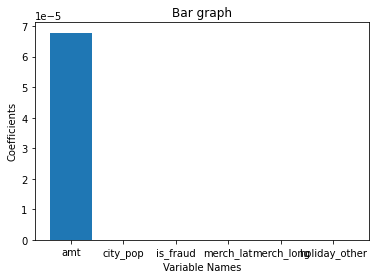

In [117]:
import matplotlib.pyplot as plt

# x- and y-axis values
x = cols
y = coeffs

# plotting the bar graph
plt.bar(x, y)
plt.xlabel('Variable Names')
plt.ylabel('Coefficients')
plt.title('Bar graph')
plt.show()


Hence, from the above graph we can see that the variable indicating the amount of money has the biggest contribution to predicting the possibility of a fraud.